## Homework 2
by Quynh Anh Pham

In [9]:
import pandas as pd
import numpy as np
import requests

1. Get the time series for the following cryptocurrencies from `cryptowat.ch` starting from 2021-11-22, hourly data
    1. ETH
    2. SOL
    3. AVAX
    4. USDT
    5. FLOW

In [10]:
def get_data(token, start_date, exchange='coinbase-pro'):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp(start_date).timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df


In [11]:
cb_tokens = ['ETH', 'SOL', 'AVAX', 'USDT']
kk_tokens = ['FLOW']
start_date = '2021-11-22'

tokens = cb_tokens + kk_tokens

In [12]:
df_cb = [get_data(token,start_date) for token in cb_tokens]
df_kk = [get_data(token,start_date,'kraken') for token in kk_tokens]

In [13]:
df_base = df_cb + df_kk

In [14]:
df_base

[                     ts     open     high      low    close        volume  \
 0   2021-11-22 00:00:00  4317.98  4342.24  4246.07  4262.99   7262.562789   
 1   2021-11-22 01:00:00  4263.04  4270.34  4212.45  4234.37   8437.946084   
 2   2021-11-22 02:00:00  4234.87  4246.72  4171.17  4217.89   9259.725370   
 3   2021-11-22 03:00:00  4217.88  4223.48  4163.58  4193.47   9259.899519   
 4   2021-11-22 04:00:00  4192.95  4213.59  4147.00  4168.35   7934.546906   
 ..                  ...      ...      ...      ...      ...           ...   
 685 2021-12-20 13:00:00  3814.63  3815.80  3770.17  3782.86   4682.198085   
 686 2021-12-20 14:00:00  3782.85  3811.00  3766.88  3776.87   5356.147003   
 687 2021-12-20 15:00:00  3777.07  3848.53  3754.80  3840.19  17507.992019   
 688 2021-12-20 16:00:00  3838.73  3842.00  3794.17  3801.41   6336.438977   
 689 2021-12-20 17:00:00  3801.69  3810.23  3792.71  3806.83   1287.000212   
 
         volumeUSD token  
 0    3.123077e+07   ETH  
 1    3.

In [15]:
df = pd.concat(df_base, keys='token').set_index('ts')

df.head()

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH


2. Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [17]:
df.groupby('token')['volumeUSD'].sum().to_frame().sort_values('volumeUSD',ascending=False)

,volumeUSD
token,
ETH,2.553137e+10
SOL,8.349928e+09
AVAX,4.564640e+09
USDT,2.305981e+09
FLOW,9.799043e+07


3. Add a column that calculates the close price ratio between ETH and SOL for each hour (i.e. close price of ETH / close price of SOL for each period)

In [18]:
# adding the ratio column to the existing data frame
df['eth_sol_close_ratio'] = df[df['token']=='ETH']['close'] / df[df['token'] == 'SOL']['close']

In [19]:
# removing the values from every tokens other than ETH
df['eth_sol_close_ratio'].loc[df.token != "ETH"] = np.nan

/Users/anhpham/opt/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
df[df.token == "ETH"]

,open,high,low,close,volume,volumeUSD,token,eth_sol_close_ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-20 13:00:00,3814.63,3815.80,3770.17,3782.86,4682.198085,1.773570e+07,ETH,22.215527
2021-12-20 14:00:00,3782.85,3811.00,3766.88,3776.87,5356.147003,2.028810e+07,ETH,22.207738
2021-12-20 15:00:00,3777.07,3848.53,3754.80,3840.19,17507.992019,6.657968e+07,ETH,22.170718


In [21]:
df[df.token != "ETH"]

,open,high,low,close,volume,volumeUSD,token,eth_sol_close_ratio
ts,,,,,,,,
2021-11-22 00:00:00,230.483,234.688,228.805,230.785,93531.805000,2.172284e+07,SOL,NaN
2021-11-22 01:00:00,230.752,232.269,225.052,226.000,88840.999000,2.017188e+07,SOL,NaN
2021-11-22 02:00:00,225.952,227.996,223.812,227.037,95224.398000,2.153562e+07,SOL,NaN
2021-11-22 03:00:00,227.012,227.485,221.900,223.117,73456.342000,1.646345e+07,SOL,NaN
2021-11-22 04:00:00,223.129,224.545,220.080,220.652,78399.621000,1.742352e+07,SOL,NaN
...,...,...,...,...,...,...,...,...
2021-12-20 13:00:00,8.151,8.151,8.040,8.050,8386.948252,6.790392e+04,FLOW,NaN
2021-12-20 14:00:00,8.034,8.102,8.034,8.082,9405.328266,7.597483e+04,FLOW,NaN
2021-12-20 15:00:00,8.064,8.093,8.011,8.093,28745.660629,2.313734e+05,FLOW,NaN


In [22]:
# Another view

eth_sol = df[df.token=="ETH"]["close"].rename("close_ETH").to_frame().join(
    df[df.token=="SOL"]["close"].rename("close_SOL").to_frame()
)
eth_sol['close_ratio']= eth_sol['close_ETH']/eth_sol['close_SOL']
eth_sol

,close_ETH,close_SOL,close_ratio
ts,,,
2021-11-22 00:00:00,4262.99,230.785,18.471694
2021-11-22 01:00:00,4234.37,226.000,18.736150
2021-11-22 02:00:00,4217.89,227.037,18.577985
2021-11-22 03:00:00,4193.47,223.117,18.794937
2021-11-22 04:00:00,4168.35,220.652,18.891059
...,...,...,...
2021-12-20 13:00:00,3782.86,170.280,22.215527
2021-12-20 14:00:00,3776.87,170.070,22.207738
2021-12-20 15:00:00,3840.19,173.210,22.170718


4. Change the name of the `volume` and `volumeUSD` columns to `volumeBase` and `volumeTerm`

In [23]:
df.rename(
columns={
    "volume":"volumeBase",
    "volumeUSD": "volumeTerm"
}
)

,open,high,low,close,volumeBase,volumeTerm,token,eth_sol_close_ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-20 13:00:00,8.151,8.151,8.040,8.050,8386.948252,6.790392e+04,FLOW,NaN
2021-12-20 14:00:00,8.034,8.102,8.034,8.082,9405.328266,7.597483e+04,FLOW,NaN
2021-12-20 15:00:00,8.064,8.093,8.011,8.093,28745.660629,2.313734e+05,FLOW,NaN


5. Create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of  200 rows and 5 columns)


In [24]:
# not sure why this is not working 
# df_fat = pd.DataFrame()

for tok in tokens:
    cls_coin = df[df.token == tok]['close'].rename(f'close_{tok}').to_frame()
    if tok == tokens[0]:
        df_fat = cls_coin
    df_fat.merge(cls_coin, on='ts', how='left')
#     print(df_fat)

In [25]:
df_fat.head()

,close_ETH
ts,
2021-11-22 00:00:00,4262.99
2021-11-22 01:00:00,4234.37
2021-11-22 02:00:00,4217.89
2021-11-22 03:00:00,4193.47
2021-11-22 04:00:00,4168.35


In [26]:
# redo another method

def clean_dataframe(original_df):
    cleaned_df = original_df.set_index('ts')['close'].rename(f'close_{original_df.token[0]}').to_frame()
    return cleaned_df 



In [27]:
cleaned_dataframes = [clean_dataframe(original_df) for original_df in df_base]

In [28]:
import functools

In [29]:
df_fat = functools.reduce(lambda a,b: a.join(b), cleaned_dataframes)
df_fat

,close_ETH,close_SOL,close_AVAX,close_USDT,close_FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-20 13:00:00,3782.86,170.280,103.42,1.0003,8.050
2021-12-20 14:00:00,3776.87,170.070,103.07,1.0002,8.082
2021-12-20 15:00:00,3840.19,173.210,104.74,1.0002,8.093


6. Calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))


In [30]:
df_returns = pd.DataFrame()

for tok in tokens:
    df_returns[f'log_returns_{tok}'] = np.log(df_fat[f'close_{tok}']/df_fat[f'close_{tok}'].shift(1))
    
df_returns

,log_returns_ETH,log_returns_SOL,log_returns_AVAX,log_returns_USDT,log_returns_FLOW
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
...,...,...,...,...,...
2021-12-20 13:00:00,-0.008314,-0.013243,-0.008569,0.0001,-0.014062
2021-12-20 14:00:00,-0.001585,-0.001234,-0.003390,-0.0001,0.003967
2021-12-20 15:00:00,0.016626,0.018295,0.016073,0.0000,0.001360



[Stretch] calculate the correlation of the tokens using the table above


In [31]:
df_returns.corr()

,log_returns_ETH,log_returns_SOL,log_returns_AVAX,log_returns_USDT,log_returns_FLOW
log_returns_ETH,1.000000,0.762296,0.655938,-0.088045,0.579547
log_returns_SOL,0.762296,1.000000,0.646990,0.104194,0.476211
log_returns_AVAX,0.655938,0.646990,1.000000,0.014292,0.403553
log_returns_USDT,-0.088045,0.104194,0.014292,1.000000,-0.176123
log_returns_FLOW,0.579547,0.476211,0.403553,-0.176123,1.000000



[Stretch] visualize the correlation in a matplpotlib plot


In [32]:
import matplotlib.pyplot as plt

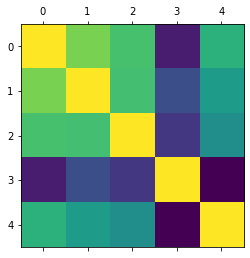

In [33]:
plt.matshow(df_returns.corr())
plt.show()